In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns

In [7]:
def random_hr(stress: bool = False) -> np.ndarray:
    if stress:
        return np.random.randint(110, 180) + np.random.rand() * 10
    else:
        return np.random.randint(65, 100) + np.random.rand() * 10

def random_distance(stress: bool = False) -> np.ndarray:
    if stress:
        return np.random.randint(0, 100) + np.random.rand() * 10
    else:
        return np.random.randint(0, 20) + np.random.rand() * 5

def random_humidity(stress: bool = False) -> np.ndarray:
    if stress:
        return np.random.randint(50, 100) + np.random.rand() * 10
    else:
        return np.random.randint(0, 50) + np.random.rand() * 5

print("Random Heart Rate:", random_hr())
print("Random Distance:", random_distance())
print("Random Humidity:", random_humidity())
print('----'*15)
print("Random Heart Rate (Stress):", random_hr(stress=True))
print("Random Distance (Stress):", random_distance(stress=True))
print("Random Humidity (Stress):", random_humidity(stress=True))

Random Heart Rate: 102.02625934033523
Random Distance: 13.947322031002445
Random Humidity: 34.30210316741289
------------------------------------------------------------
Random Heart Rate (Stress): 149.33101399876105
Random Distance (Stress): 74.07320183042228
Random Humidity (Stress): 75.67770098194136


In [3]:
# create a random dataset of fake heart rate, distance, and humidity data

def create_random_dataset(num_samples: int = 1000) -> pd.DataFrame:
    data = {
        'heart_rate': [random_hr() for _ in range(num_samples)],
        'distance': [random_distance() for _ in range(num_samples)],
        'humidity': [random_humidity() for _ in range(num_samples)],
        'stress': [0 for _ in range(num_samples)]  # 0 for no stress, 1 for stress
    }
    # Add some stress data
    for i in range(num_samples // 10):
        data['heart_rate'][i] = random_hr(stress=True)
        data['distance'][i] = random_distance(stress=True)
        data['humidity'][i] = random_humidity(stress=True)
        data['stress'][i] = 1
    return pd.DataFrame(data)

df = create_random_dataset(10000)
df

,heart_rate,distance,humidity,stress
0,183.031154,92.391858,95.248839,1
1,125.206362,34.146534,99.676426,1
2,135.241632,45.093883,94.040350,1
3,129.283161,38.054358,63.034983,1
4,143.174008,42.443153,99.527877,1
...,...,...,...,...
9995,77.232171,1.838527,33.191294,0
9996,84.810501,12.774548,33.304243,0
9997,84.895525,1.917853,20.611602,0
9998,79.649396,2.404868,39.163830,0


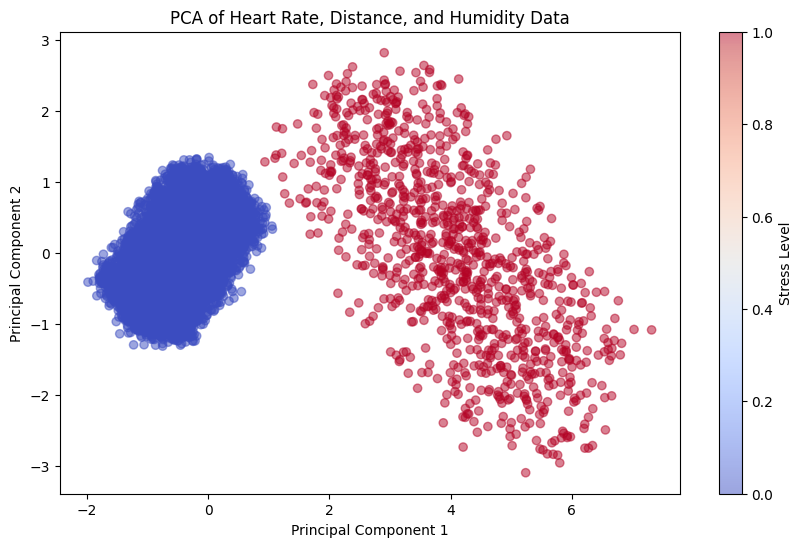

In [4]:
# using dimensionality reduction to visualize the data and using pipelines to streamline the process
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# create a pipeline for PCA and standard scaling
pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))

# fit the pipeline to the data
pipeline.fit(df[['heart_rate', 'distance', 'humidity']])

# transform the data
transformed_data = pipeline.transform(df[['heart_rate', 'distance', 'humidity']])

# plot the transformed data

plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=df['stress'], cmap='coolwarm', alpha=0.5)
plt.title('PCA of Heart Rate, Distance, and Humidity Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Stress Level')
plt.savefig('pca_visualization.png')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1792
           1       1.00      1.00      1.00       208

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1792    0]
 [   0  208]]


<Figure size 800x600 with 0 Axes>

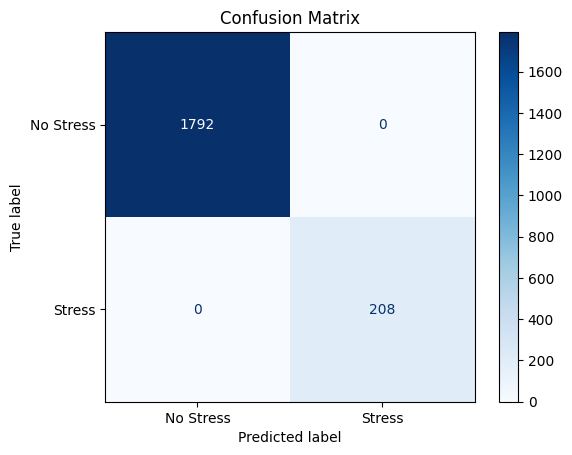

In [5]:
# using svm for classification

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# split the data into training and testing sets
X = df[['heart_rate', 'distance', 'humidity']]
y = df['stress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a pipeline for SVM and standard scaling
pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipeline.predict(X_test)

# print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues', display_labels=['No Stress', 'Stress'])
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()



In [6]:
testdb = pd.DataFrame({
    'heart_rate': [120],
    'distance': [100],
    'humidity': [90]
})

pipeline.predict(testdb)

array([1], dtype=int64)

In [5]:
import datetime
#10/06/25 au 3/10/25
date1 = datetime.datetime(2025, 6, 10)
date2 = datetime.datetime(2025, 10, 3)
delta = date2 - date1
print(delta.days, delta.days % 7)  # Output: 11

115 3
